In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

## Generación de electricidad por tipo de energía

In [2]:
df = pd.DataFrame(columns = ["Porcentaje"], index = ["Nuclear", "Eólica", "Ciclo comb.", "Cogeneración", "Hidráulica", "Otros"])
df["Porcentaje"] = [22.0, 20.9, 20.1, 11.6, 9.7, 15.7]
df

,Porcentaje
Nuclear,22.0
Eólica,20.9
Ciclo comb.,20.1
Cogeneración,11.6
Hidráulica,9.7
Otros,15.7


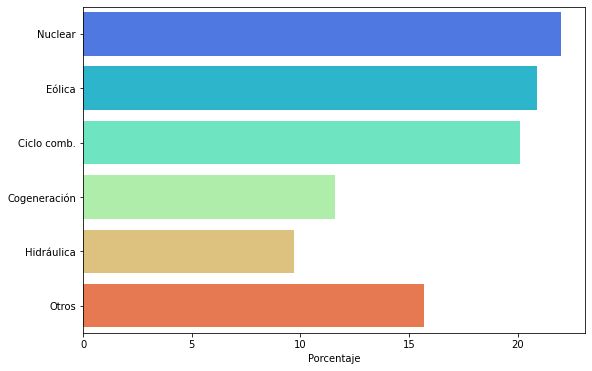

In [25]:
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x = df["Porcentaje"], y = df.index, palette="rainbow", orient = "h")
plt.savefig("produccion_2019.png")
plt.show()

## Consumo por día

In [5]:
#Se carga el dataframe df_provincias

fh = open("df_provincias.pkl", "rb")
df_provincias = pickle.load(fh)
fh.close()

In [6]:
#Se obtiene el dataframe con los datos de consumo

df_consumo = pd.read_csv("DemandaReal_2015-2021.csv", delimiter = ";")
df_consumo.drop(["id", "name", "geoid", "geoname", "datetime"], axis = 1, inplace = True)
df_consumo.columns = ["consumo"]
df_consumo = df_consumo.apply(lambda x : round(x, 2))
df_consumo

,consumo
0,25435.00
1,24511.50
2,22866.17
3,21392.83
4,20319.67
...,...
54019,27516.33
54020,29434.83
54021,29709.17
54022,28416.50


In [22]:
# Se juntan ambos dataframes en uno solo

df = pd.concat([df_provincias.iloc[:,:4], df_consumo], axis = 1)
df.drop(["date", "time", "value"], axis = 1, inplace = True)
df

,weekday,consumo
0,4,25435.00
1,4,24511.50
2,4,22866.17
3,4,21392.83
4,4,20319.67
...,...,...
54019,7,27516.33
54020,7,29434.83
54021,7,29709.17
54022,7,28416.50


In [ ]:
df.goupby()

In [16]:
agrupado = df.groupby("weekday").mean().reset_index()
agrupado

,weekday,value,consumo
0,1,55.160461,28979.308962
1,2,56.038729,29753.721684
2,3,55.860421,29838.850798
3,4,56.072791,29744.332135
4,5,55.357079,29398.652816
5,6,50.687923,26598.770267
6,7,47.360199,24706.965387


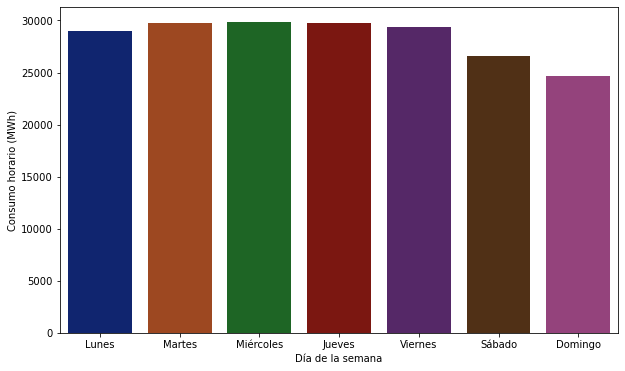

In [25]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = agrupado["weekday"], y = agrupado["consumo"], palette = "dark")
ax.set(xlabel = "Día de la semana", ylabel = "Consumo horario (MWh)")
ax.set_xticklabels(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])
plt.savefig("consumo.png")
plt.show()